# Scikit-Learn in Python

## Model 1: Simple linear regression (supervised learning)

In [106]:
import matplotlib.pyplot as plt
import numpy as np

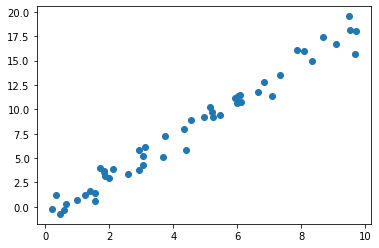

In [107]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2*x - 1 + rng.randn(50)
plt.scatter(x,y)

#### Step 1: Choose a class of model

In [114]:
from sklearn.linear_model import LinearRegression

#### Step 2: Choose model hyperparameters

In [115]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Step 3: Arrange data into a features matrix and target vector

In [116]:
X = x[:, np.newaxis]

In [117]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Step 4: Fit the model to your data

In [119]:
model.coef_

array([1.9776566])

In [120]:
model.intercept_

-0.9033107255311164

In [125]:
xfit = np.linspace(-1,11)
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

In [129]:
Xfit = xfit[:, np.newaxis]

In [130]:
yfit = model.predict(Xfit)

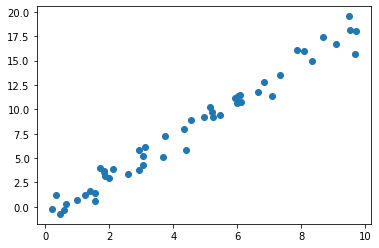

In [131]:
plt.scatter(x,y)

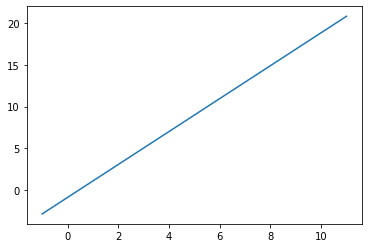

In [132]:
plt.plot(xfit, yfit)

#### Step 5: Predict labels for unknown data

In [134]:
xfit = np.linspace(-1, 11)

In [140]:
Xfit = xfit[:, np.newaxis]

In [141]:
yfit = model.predict(Xfit)

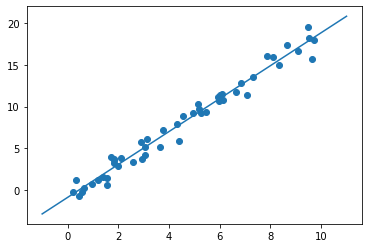

In [143]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

## Model 2: Classification - Gaussian Naive Bayes (supervised learning)

Gaussian naive bayes is often a good model to use as baseline classification: the model is so fast and has no hyperparameters to choose

In [ ]:
# Load data
import seaborn as sns
iris = sns.load_dataset('iris') 
X_iris = iris[iris.columns[range(4)]]
y_iris = iris[iris.columns[-1]]

In [ ]:
# Split the data into training and testing set
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [149]:
# Fit model
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB() # 2. instantiate model
model.fit(Xtrain, ytrain) # 3. fit model to data
y_model = model.predict(Xtest) # 4. predict on new data

In [151]:
# Calculate accuracy score
from sklearn.metrics import accuracy_score 
accuracy_score(ytest, y_model)

0.9736842105263158

## Model 3: Dimensionality reduction - Principal Component Analysis (unsupervised learning)

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data

Often dimensionality reduction is used as an aid to visualizing data - plot data in 2 dimensions instead of 4 dimensions 

PCA can be used to indicate effective classification/clustering on a dataset

In [152]:
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris) # 4. Transform the data to two dimensions

To visualize the PCA components: A quick way to do this is to insert the results into the original Iris DataFrame, and use Seaborn’s lmplot to show the results

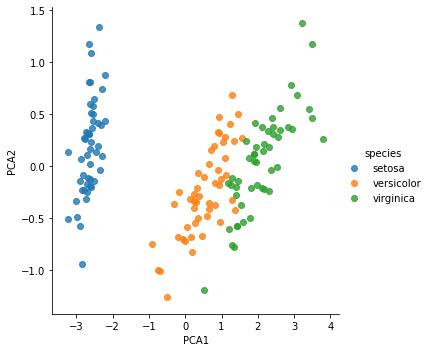

In [163]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels. This indicates to us that a relatively straightforward classification will probably be effective on the dataset

## Model 3: Clustering - Gaussian mixture model (GMM) (unsupervised learning)

A clustering algorithm attempts to find distinct groups of data without reference to any labels.

In [165]:
from sklearn import mixture # 1. Choose the model class 
model = mixture.GaussianMixture(n_components=3, covariance_type='full') # 2. Instantiate the model w/ hyperparameters 
model.fit(X_iris) # 3. Fit to data. Notice y is not specified! 
y_gmm = model.predict(X_iris) # 4. Determine cluster labels

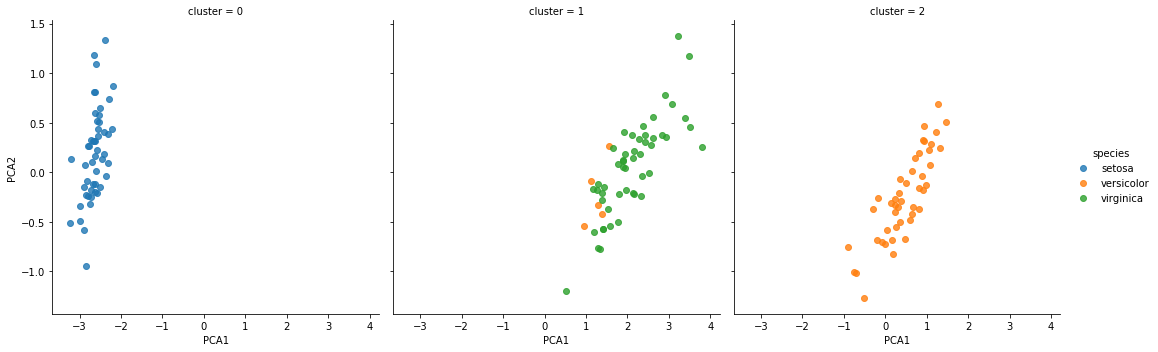

In [167]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False)

By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying label: the setosa species is separated perfectly within cluster 0, while there remains a small amount of mixing between versicolor and vir‐ ginica. 

This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could automatically identify the presence of these different groups of species with a simple clustering algorithm!